# 06wk-23: 취업(다중공선성) / Ridge – 추가해설

최규빈  
2023-10-05

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-zGKU5F7QCeZKr1JwxH9kaA&si=b3K7BTRNt8xd0olh>

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [4]:
df

# 4. True

`-` 신이라면 (=데이터가 만들어진 비밀을 알고 있다면) 아래와 같이 했을 것

In [5]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.LinearRegression()
## step3 
predictr.fit(X,y)
## step4 -- pass 

`-` 평가

In [6]:
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 0.9133
test_score: 0.9127

# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과

In [7]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.LinearRegression()
## step3 
predictr.fit(X,y)
## step4 -- pass 

`-` 평가

In [8]:
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 1.0000
test_score: 0.1171

# 6. Ridge

`-` 통계학자에게 자문: 이럴 경우 Ridge를 사용하면 됩니다..

In [9]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=1) # sklearn.linear_model.Ridge()와 같은코드
## step3 
predictr.fit(X,y)
## step4 -- pass 

`-` 평가: 안되는데요..??

In [10]:
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 1.0000
test_score: 0.1173

`-` 하이퍼 파라메터 튜닝 $\alpha=1.5$

In [11]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=1.5)
## step3 
predictr.fit(X,y)
## step4 -- pass 
#---# 
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 1.0000
test_score: 0.1174

-   조금 나아진것 같기도?

`-` 하이퍼 파라메터 튜닝 $\alpha=5e8$

In [12]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=5e8)
## step3 
predictr.fit(X,y)
## step4 -- pass 
#---# 
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 0.7507
test_score: 0.7438

`-` 오라클에 비할바는 아니긴한데 공선성이 있는 경우라도 Ridge에서 적절한
alpha를 고른다면 망하는 모형을 만들진 않음

# 7. Ridge는 왜 결과를 좋게 만들까?

## A. 정확한 설명

`-` SVD를 이용하여 이론적인 계산하면
`sklearn.linear_model.LinearRegression()`로 적합한 결과보다
`sklearn.linear_model.Ridge()`로 적합한 결과를 더 좋게 만드는 $\alpha$가
항상 존재함을 증명할 수 있음.

## B. 직관적 설명 (엄밀하지 않은 설명)

### `Step1:` LinearRegression은 왜 망했는가?

`-` 토익의 계수는 실제로 $\frac{1}{100}$이다. 적딩히

-   `toeic_coef` + … + `toeic499_coef` $\approx$ 0.01 이라면

대충 맞는 답이다.

In [13]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.LinearRegression()
## step3 
predictr.fit(X,y)
## step4 -- pass 
#---# 
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 1.0000
test_score: 0.1171

In [14]:
s= pd.Series(predictr.coef_)
s.index = X.columns
s[1:].sum()

`-` 그런데 사실 저 `0.01`이라는 값은 몇개의 계수만 있어도 만들 수 있다.
(toeic2와 toeic3에 해당하는 계수)

In [15]:
s['toeic2']+s['toeic3']

`-` 이런논리로 치면 `toeic2`, `toeic3`에 해당하는 계수만 있다면 사실
$y$를 설명하는데 충분했고, 나머지는 불필요한 특징이 된다. (그리고
불필요한 특징은 오버피팅을 유발한다)

### `Step2:` Ridge의 아이디어

`-` Ridge의 아이디어: `toeic2`, `toeic3` 와 같이 몇개의 변수로만
`0.01`이라는 수를 설명할 수 없도록 “강제”하자. 즉 몇개의 변수로만
`0.01`이라는 수를 설명할 수 없도록 “패널티”를 주자.

`-` 패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=L2-norm을 구하고), 그
값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

-   이러한 패널티를 줄 경우 결과적으로 0.01의 값이 “동일하게 나누어져서”
    나오는 값(=$\frac{1}{100}\frac{1}{501}$)이 계수값으로 추정된다. (왜?
    – 요건 정확하게 이해하는게 사실 지금은 힘듬)

`-` 잘 적용된 Ridge의 결과를 보면 아래와 같이 계수값이 저장되어 있음.

In [42]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=5e8)
## step3 
predictr.fit(X,y)
## step4 -- pass 
#---# 
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 0.7507
test_score: 0.7438

In [43]:
s = pd.Series(predictr.coef_)
s.index = X.columns
s

In [44]:
0.01/501

`-` 결국 Ridge를 사용하면 계수들의 값이 **“동일하게 나누어지는”** 효과가
나타남

> **2023-10-24 추가해설**
>
> 모든 계수가 “엔빵”된다는 의미는 아니에요. 예를들어 `X1=toeic`,
> `X2≈toeic*2` 라면?

`-` 패널티를 주는 정도? $\alpha$로 조절함.. $\alpha$를 크게 할수록
패널티를 많이줌

## C. $\alpha$에 따른 계수값 변화

`-` 여러개의 predictor 학습

In [74]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
alphas = [5e2, 5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
predictrs = [sklearn.linear_model.Ridge(alpha=alpha) for alpha in alphas]
## step3 
for predictr in predictrs:
    predictr.fit(X,y)
## step4 -- pass 

`-` 계수값 시각화

In [88]:
predictrs[0].alpha

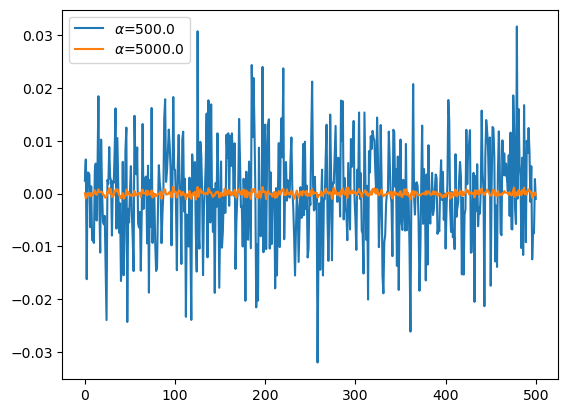

In [94]:
plt.plot(predictrs[0].coef_[1:],label=r'$\alpha$={}'.format(predictrs[0].alpha))
plt.plot(predictrs[3].coef_[1:],label=r'$\alpha$={}'.format(predictrs[1].alpha))
plt.legend()

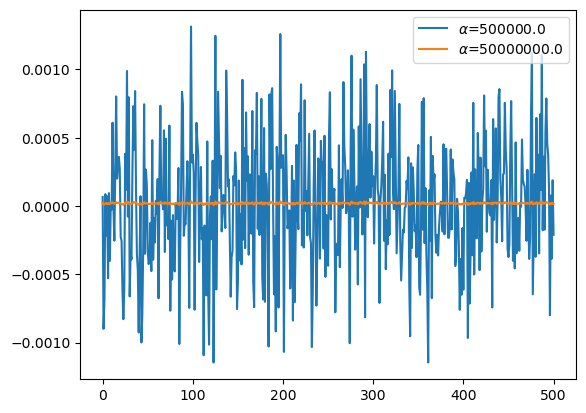

In [95]:
plt.plot(predictrs[3].coef_[1:],label=r'$\alpha$={}'.format(predictrs[3].alpha))
plt.plot(predictrs[5].coef_[1:],label=r'$\alpha$={}'.format(predictrs[5].alpha))
plt.legend()

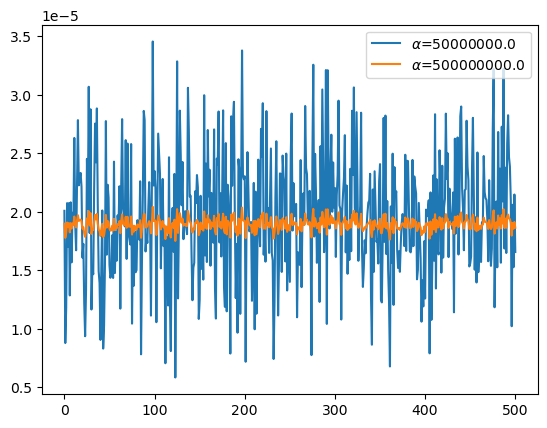

In [96]:
plt.plot(predictrs[5].coef_[1:],label=r'$\alpha$={}'.format(predictrs[5].alpha))
plt.plot(predictrs[-1].coef_[1:],label=r'$\alpha$={}'.format(predictrs[-1].alpha))
plt.legend()

`-` 직관: 마지막 predictor의 계수값을 살펴보자.

In [105]:
predictrs[-1].coef_

-   불필요한 변수가 나올 수 없는 구조가 되어버렸음 (한 두개로 0.01을
    만들 수 없음)
-   모든 변수는 대략 2e-5($\approx \frac{1}{100}\frac{1}{501}$)정도 만큼
    똑같이 중요하다고 생각된다.
-   고급: 살짝 1/(100\*501)보다 전체적으로 값이 작아보이는데, 이는
    기분탓이 아님 (Ridge 특징)

In [107]:
1/100*1/501

## D. $\alpha$에 따른 실험내용 정리

`-` 예비개념: L2-penalty는 그냥 대충 분산같은것..

In [278]:
x = np.random.randn(5)
l2_penalty = (x**2).sum()
l2_penalty, 5*(x.var()+(x.mean()**2))

`-` $\alpha$가 커질수록 생기는 일

-   크게 느낀것: 계수들의 값이 점점 비슷해짐 –\> 계수들의 값들을 모아서
    분산을 구하면 작아진다는 의미 –\> L2-penalty 가 작아진다는 의미
-   미묘하게 느껴지는 점: `toeic`, 그리고 `toeic0~toeic499` 까지의
    계수총합은 0.01이 되어야 하는데, 그 총합이 미묘하게 작어지는 느낌.

In [304]:
for predictr in predictrs: 
    print(
        f'alpha={predictr.alpha:.2e}\t'
        f'l2_penalty={((predictr.coef_)**2).sum():.6f}\t'
        f'sum(toeic_coefs)={((predictr.coef_[1:])).sum():.4f}\t'
        f'test_score={predictr.score(XX,yy):.4f}'
    )

alpha=5.00e+02  l2_penalty=0.046715 sum(toeic_coefs)=0.0103 test_score=0.2026
alpha=5.00e+03  l2_penalty=0.021683 sum(toeic_coefs)=0.0102 test_score=0.4638
alpha=5.00e+04  l2_penalty=0.003263 sum(toeic_coefs)=0.0099 test_score=0.6889
alpha=5.00e+05  l2_penalty=0.000109 sum(toeic_coefs)=0.0099 test_score=0.7407
alpha=5.00e+06  l2_penalty=0.000002 sum(toeic_coefs)=0.0099 test_score=0.7447
alpha=5.00e+07  l2_penalty=0.000000 sum(toeic_coefs)=0.0098 test_score=0.7450
alpha=5.00e+08  l2_penalty=0.000000 sum(toeic_coefs)=0.0095 test_score=0.7438

`-` L2-penalty의 느낌은 대충 아래와 같이 분산으로 이해해도 무방

In [308]:
for predictr in predictrs: 
    print(
        f'alpha={predictr.alpha:.2e}\t'
        f'var(coefs)={(predictr.coef_).var()*501:.6f}\t'
        f'sum(toeic_coefs)={((predictr.coef_[1:])).sum():.4f}\t'
        f'test_score={predictr.score(XX,yy):.4f}'
    )

alpha=5.00e+02  var(coefs)=0.046618 sum(toeic_coefs)=0.0103 test_score=0.2026
alpha=5.00e+03  var(coefs)=0.021638 sum(toeic_coefs)=0.0102 test_score=0.4638
alpha=5.00e+04  var(coefs)=0.003256 sum(toeic_coefs)=0.0099 test_score=0.6889
alpha=5.00e+05  var(coefs)=0.000109 sum(toeic_coefs)=0.0099 test_score=0.7407
alpha=5.00e+06  var(coefs)=0.000001 sum(toeic_coefs)=0.0099 test_score=0.7447
alpha=5.00e+07  var(coefs)=0.000000 sum(toeic_coefs)=0.0098 test_score=0.7450
alpha=5.00e+08  var(coefs)=0.000000 sum(toeic_coefs)=0.0095 test_score=0.7438

## E. $\alpha$가 크다고 무조건 좋은건 아니다.

In [316]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=1e12)
## step3 
predictr.fit(X,y)
## step4 -- pass 

In [317]:
print(f'train_score={predictr.score(X,y):.4f}')
print(f'test_score={predictr.score(XX,yy):.4f}')

train_score=0.0191
test_score=0.0140

In [322]:
predictr.coef_[1:].sum() # 이 값이 0.01이어야 하는데, 많이 작아짐